In [55]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [56]:
# File to Load (Remember to change these)
city_data = "data/city_data.csv"

ride_data = "data/ride_data.csv"



In [57]:
# Read the City Data
city_data_df = pd.read_csv(city_data)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [58]:
# Read the Ride Data

ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [59]:
# Combine the data into a single dataset
merged_df = pd.merge(city_data_df, ride_data_df, on="city")

In [60]:
# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [61]:
#Average Fare Per City
average_fare = merged_df.groupby("city")["fare"].mean()
average_fare = pd.DataFrame(average_fare).reset_index()
average_fare = average_fare.rename(columns = {'fare': 'avg_fare'})
#Total Number of Rides Per City
total_rides = merged_df.groupby("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides).reset_index()
total_rides = total_rides.rename(columns = {'ride_id': 'total_rides'})
#Total Drivers
total_drivers = merged_df[["city", "driver_count"]].drop_duplicates("city")
#City Type
city_type = merged_df[["city", "type"]].drop_duplicates("city")
final_df = pd.merge(pd.merge(pd.merge(average_fare, total_rides, on="city"), 
                             total_drivers, on="city"), city_type, on="city")

## Bubble Plot of Ride Sharing Data

In [62]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


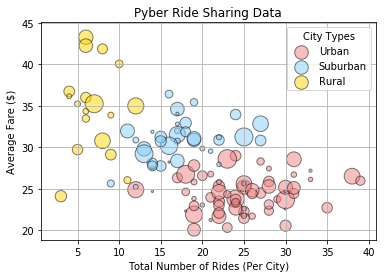

In [63]:
#Bubble Plot Data
urban_group = final_df.loc[final_df['type'] == 'Urban']
suburban_group = final_df.loc[final_df['type'] == 'Suburban']
rural_group = final_df.loc[final_df['type'] == 'Rural']

#Bubble Plot
ax1 = urban_group.plot(kind='scatter',x='total_rides', y='avg_fare',
                       color='lightcoral', s=final_df['driver_count']*5, label = 'Urban', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1)    
ax2 = suburban_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                          color='lightskyblue',s=final_df['driver_count']*5, label = 'Suburban', 
                          alpha = 0.5, edgecolor = "black", linewidths = 1, ax=ax1)    
ax3 = rural_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                       color='gold', s=final_df['driver_count']*5, label = 'Rural', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1, ax=ax1)
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title = 'City Types')
plt.grid(True)

# Show plot
plt.show()


## Total Fares by City Type

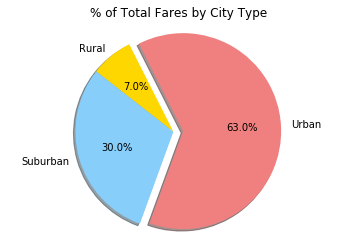

In [64]:
# Calculate Type Percents

total_fares = merged_df["fare"].sum()
urban_fare = merged_df.loc[merged_df["type"] == "Urban", "fare"].sum()
rural_fare = merged_df.loc[merged_df["type"] == "Rural", "fare"].sum()
suburban_fare = merged_df.loc[merged_df["type"] == "Suburban", "fare"].sum()
urban_fare_p = round(urban_fare/total_fares, 2) *100
rural_fare_p = round(rural_fare/total_fares, 2) *100
suburban_fare_p = round(suburban_fare/total_fares, 2) *100

# Build Pie Chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_fare_p, rural_fare_p, suburban_fare_p]
explode = (0.1, 0, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal')  

plt.title("% of Total Fares by City Type")

# Show Figure
plt.show()


## Total Rides by City Type

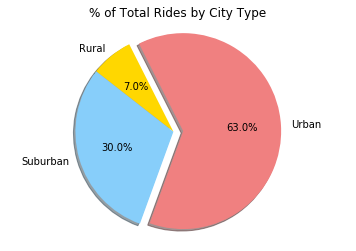

In [70]:
# Calculate Ride Percents

final_total_rides = len(merged_df)
urban_rides = round(merged_df.loc[merged_df["type"] == "Urban", "ride_id"].count()/final_total_rides, 2) * 100
rural_rides = round(merged_df.loc[merged_df["type"] == "Rural", "ride_id"].count()/final_total_rides, 2) * 100
suburban_rides = round(merged_df.loc[merged_df["type"] == "Suburban", "ride_id"].count()/final_total_rides, 2) * 100

# Build Pie Chart

labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_fare_p, rural_fare_p, suburban_fare_p]
explode = (0.1, 0, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal') 
plt.title("% of Total Rides by City Type")


# Save Figure

plt.show()


## Total Drivers by City Type

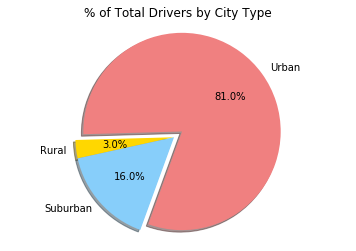

In [71]:
# Calculate Driver Percents

final_total_drivers = final_df["driver_count"].sum()
urban_drivers = round(final_df.loc[final_df["type"] == "Urban", "driver_count"].sum()/final_total_drivers, 2)* 100
rural_drivers = round(final_df.loc[final_df["type"] == "Rural", "driver_count"].sum()/final_total_drivers, 2)* 100
suburban_drivers = round(final_df.loc[final_df["type"] == "Suburban", "driver_count"].sum()/final_total_drivers, 2)* 100


# Build Pie Charts

labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_drivers, rural_drivers, suburban_drivers]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal') 
plt.title("% of Total Drivers by City Type")

# Save Figure

plt.show()
